## k-Nearest Neighbors

### O k-Nearest Neighbors (kNN) é um algoritmo de aprendizado supervisionado utilizado tanto para classificação quanto para regressão em Machine Learning (ML). Aqui, focaremos no seu funcionamento em modelos de regressão.

### 1 - **Conceito Básico**

#### O kNN é um algoritmo baseado em instâncias, o que significa que ele não tenta construir um modelo explícito, mas sim memoriza as instâncias de treinamento, que são usadas diretamente para fazer previsões. Para prever o valor de uma nova instância (ponto de dados), o kNN procura pelos k vizinhos mais próximos dessa instância nos dados de treinamento.

### 2 - **Medida de Proximidade**

#### A proximidade entre instâncias pode ser medida utilizando diversas métricas, como a distância Euclidiana, a distância de Manhattan, a distância de Minkowski, entre outras. A escolha da métrica de distância depende do tipo de dados e do problema em questão.

### 3 - **Processo de Previsão** 

#### Para prever o valor de uma nova instância:
#### - Calcule a distância entre essa instância e todas as outras instâncias no conjunto de treinamento.
#### - Identifique os k vizinhos mais próximos com base na medida de distância escolhida.
#### - Para problemas de regressão, o valor previsto para a nova instância pode ser a média (ou a mediana) dos valores-alvo das k instâncias mais próximas.

### 4 - **Escolha do Valor de $k$**

#### O valor de $k$ é um hiperparâmetro crítico no kNN. Valores maiores de $k$ suavizam as previsões ao considerar uma vizinhança maior, enquanto valores menores podem capturar melhor detalhes locais, mas podem ser mais sensíveis a ruídos nos dados de treinamento. A escolha de $k$ geralmente é feita através de técnicas como validação cruzada.

### 5 - **Aplicações e Considerações**

#### O kNN é relativamente simples e intuitivo, mas pode ser computacionalmente caro, especialmente em grandes conjuntos de dados, devido ao cálculo de distâncias para cada previsão. A performance do kNN pode ser afetada pela escala dos dados e pela escolha da métrica de distância.

### 6 - **Treinamento e Avaliação**

#### O treinamento no kNN é rápido, pois envolve apenas a memorização dos dados de treinamento. A avaliação pode ser mais lenta, pois cada previsão requer o cálculo das distâncias entre a instância de teste e todas as instâncias de treinamento.

----------------------------------------------------------------------------------------------------------------------------------------------------------

#### Para implementar um modelo kNN (k-Nearest Neighbors) usando scikit-learn, seguiremos um processo semelhante ao utilizado anteriormente, adaptando os parâmetros específicos para o kNN.

In [11]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
# Carregar os dados
data = pd.read_csv('datasets/SPAECE_2018_codificado.csv')

In [13]:
# Dividir as features e o target
features = ['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI', 'ACESSO A INTERNET', 
            'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS', 'CURSO O ENSINO FUNDAMENTAL', 
            'REPROVOU', 'ABANDONOU A ESCOLA', 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE', 
            'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES', 'TURNO ESCOLAR', 
            'NUMERO DE PONTOS EM PORTUGUES','PROFICIENCIA EM PORTUGUES']

# Retirado 'NUMERO DE PONTOS EM MATEMATICA' por conta do viés com a coluna target 

X = data[features]
y = data['PROFICIENCIA EM MATEMATICA']

In [14]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Treinar o modelo kNN (k-Nearest Neighbors)
model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [16]:
# Fazer previsões
y_pred = model.predict(X_test)

In [17]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [18]:
# Exibir as métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 2038.5820805436706
Root Mean Squared Error (RMSE): 45.150659801864144
Mean Absolute Error (MAE): 35.13074597580722
Mean Absolute Percentage Error (MAPE): 12.894884591776298
R² Score: 0.26878961313680905


In [19]:
# Ajustar uma linha de regressão linear simples para os dados previstos vs reais
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)

# Coeficientes da linha de regressão
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Gerar pontos para a linha de regressão
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope * x_line + intercept

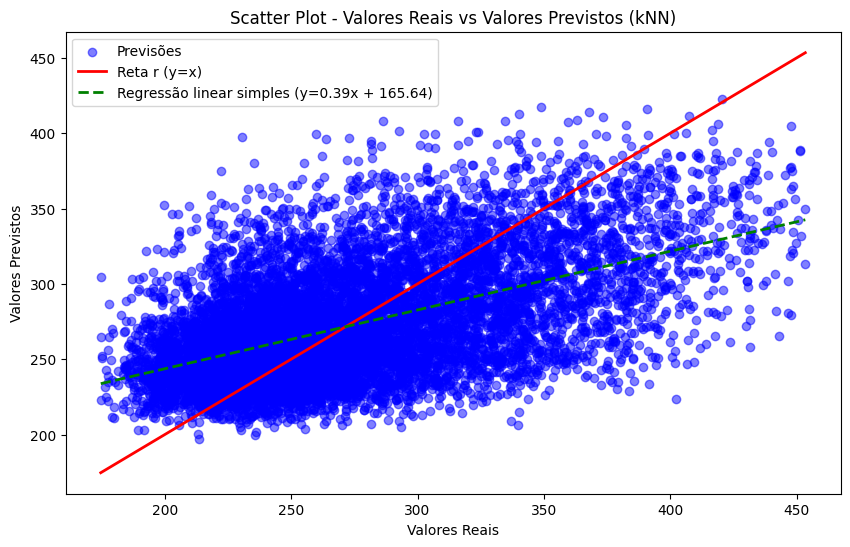

In [20]:
# Gráfico Scatter Plot Valores Reais x Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta r (y=x)')
plt.plot(x_line, y_line, color='green', lw=2, linestyle='--', label=f'Regressão linear simples (y={slope:.2f}x + {intercept:.2f})')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Scatter Plot - Valores Reais vs Valores Previstos (kNN)')
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------